In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os

lst_X = pickle.load(open("/home/grehl/robots/julius_util_ws/src/tubaf_gripper/tbf_gripper_autonomy/data/pickle/20181106_2/solution_X.pickle", "rb"))

In [2]:
print "Anzahl der Transformationen: %d" % len(lst_X)
print "Erste Transformation:\n%s" % lst_X[0]

Anzahl der Transformationen: 10
Erste Transformation:
[[ 0.57731059  0.00992112 -0.00287131  0.12160243]
 [ 0.00996821 -0.57735342  0.00650458  0.17688809]
 [ 0.00274906  0.00653229  0.57712818 -0.21790693]
 [ 0.          0.          0.          1.        ]]


In [3]:
from scipy.spatial.transform import Rotation as R
lst_R = []
lst_t = []
for X in lst_X:
    lst_t.append(X[:3, 3])
    lst_R.append(R.from_dcm(X[:3, :3]))
lst_t = np.asarray(lst_t)
lst_roll = []
lst_pitch = []
lst_yaw = []
as_deg = False

def norm_anlge(angle, border, inc):
    if angle > border:
        angle -= inc
    if angle <-border:
        angle+=inc
    return angle
border = 3.0
for rot in lst_R:
    [roll, pitch, yaw] = rot.as_euler('xyz', as_deg)
    
    if as_deg:
        inc = 360.0
    else:
        inc = np.pi
    lst_roll.append(norm_anlge(roll, border, inc))
    lst_pitch.append(norm_anlge(pitch, border, inc))
    lst_yaw.append(norm_anlge(yaw, border, inc))
print "Max(roll): %1.4f" % max(lst_roll)
print "Min(roll): %1.4f" % min(lst_roll)
print "Max(pitch): %1.4f" % max(lst_pitch)
print "Min(pitch): %1.4f" % min(lst_pitch)
print "Max(yaw): %1.4f" % max(lst_yaw)
print "Min(yaw): %1.4f" % min(lst_yaw)

Max(roll): 0.0081
Min(roll): -0.0001
Max(pitch): 0.0041
Min(pitch): 0.0001
Max(yaw): 0.0292
Min(yaw): 0.0150


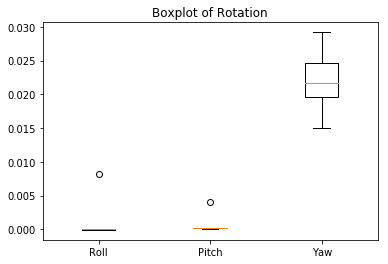

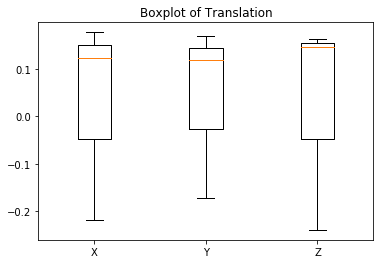

In [7]:
# Prob. update matplotlib to avoid errors
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot of Rotation')
data= [lst_roll, lst_pitch, lst_yaw]
labels = ["Roll", "Pitch", "Yaw"]
ax1.boxplot(data, labels=labels);

fig1, ax2 = plt.subplots()
ax2.set_title('Boxplot of Translation')
data= [lst_t[0,:], lst_t[1,:], lst_t[2,:]]
labels = ["X", "Y", "Z"]
ax2.boxplot(data, labels=labels);

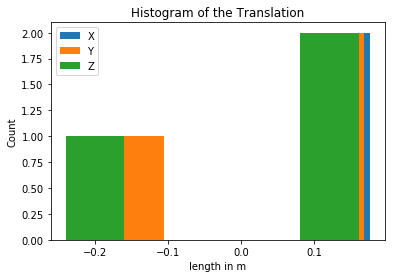

In [5]:
# Translation
n_bins= int(np.rint(len(lst_t)/2))
label = ['X','Y','Z']
for str_angle, data in zip(label, [lst_t[0,:], lst_t[1,:], lst_t[2,:]]):
    plt.hist(data, n_bins, histtype='stepfilled', label=str_angle)
plt.xlabel('length in m');
plt.ylabel('Count');
plt.title('Histogram of the Translation');
plt.legend();

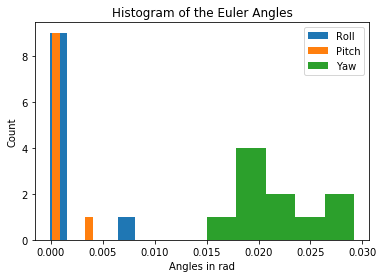

In [6]:
# Rotation
n_bins= int(np.rint(len(lst_roll)/2))
label = ['Roll','Pitch','Yaw']
for str_angle, data in zip(label, [lst_roll, lst_pitch, lst_yaw]):
    plt.hist(data, n_bins, histtype='stepfilled', label=str_angle)
plt.xlabel('Angles in '+('°'if as_deg else 'rad'));
plt.ylabel('Count');
plt.title('Histogram of the Euler Angles');
plt.legend();

In [19]:
roll = np.median(lst_roll)
pitch = np.median(lst_pitch)
yaw = np.median(lst_yaw)
translation = [np.median(lst_t[0,:]), np.median(lst_t[1,:]), np.median(lst_t[2,:])]
rot_mat = R.from_euler('xyz', [roll, pitch, yaw], degrees=as_deg)
X = np.eye(4)
X[:3, :3] = rot_mat.as_dcm()
X[:3, 3] = translation
np.set_printoptions(precision=2, suppress=True)
print X
print np.linalg.norm(translation)

[[ 1.   -0.02  0.    0.12]
 [ 0.02  1.    0.    0.12]
 [-0.   -0.    1.    0.15]
 [ 0.    0.    0.    1.  ]]
0.22288860099028837


In [25]:
print np.multiply(X[:3, :3], np.transpose(X[:3, :3]))

[[ 1. -0. -0.]
 [-0.  1. -0.]
 [-0. -0.  1.]]
